C:\Users\dell\Anaconda3\lib\site-packages\yahoo_fin\stock_info.py:82: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = result.sort_values("date")


Populating the interactive namespace from numpy and matplotlib


C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['loads']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['close']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


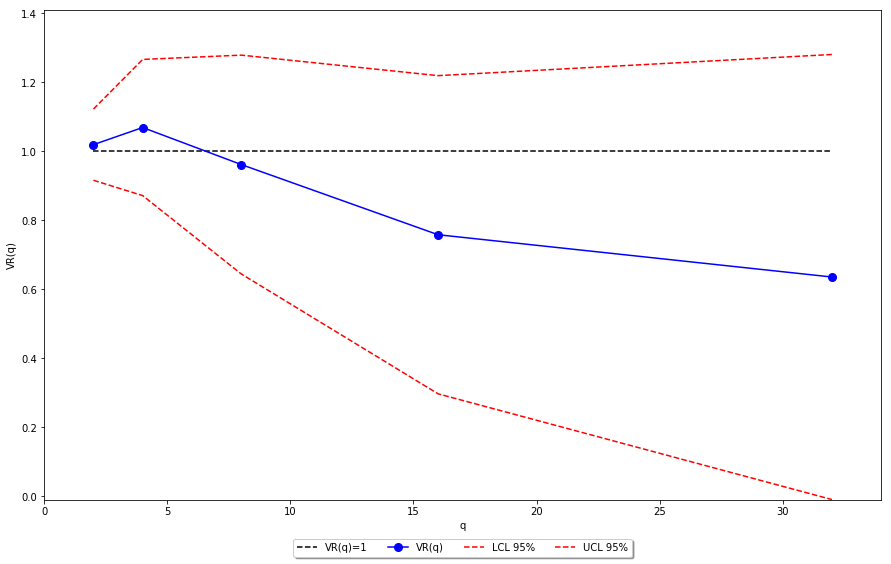

In [1]:
import pandas as pd

import datetime
import numpy as np
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()




from yahoo_fin.stock_info import *

stock = get_data('goog' , start_date = '01/01/2016' , end_date = '01/10/2018')

stock.head()

# This line is necessary for the plot to appear in a Jupyter notebook%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
stock["close"].plot(grid = False) # Plot the adjusted closing price of AAPL
close = pd.DataFrame(stock["close"])
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
def VRTest(x,k):
    
    x = np.asarray(x)
    x = np.log(x)
    n = len(x)-1

    # Estimate the mean
    mu = (x[-1]-x[0])/n
  
    # Estimate the variance for the 1st order difference

    sig_1 = sum((x[1:n]-x[0:n-1]-mu)**2)/(n)
  
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
    for i in range(len(q)):
        m=(n-q[i]+1)*(1-q[i]/n)
       # Estimate the variance for the q-th order difference
        sig_q=sum((x[1+q[i]:n]-x[1:n-q[i]]-q[i]*mu)**2)/(m*q[i])
       # The raw value of the VRT
        vr=sig_q/(sig_1)

        vv=0
        for j in range (1,q[i]):
             
            sum2=sum((x[2:n-j]-x[1:n-j-1]-mu)**2)
             
            sum1=sum(((x[j+2:n]-x[j+1:n-1]-mu)**2)*(((x[2:n-j]-x[1:n-j-1]-mu)**2)))
                
            delta=sum1/(sum2**2)
            vv=vv+(((2*(q[i]-j)/q[i])**2)*delta)
        v=vv
        z=(vr-1)/sqrt(v)
        one=1
        lower=vr-2*sqrt(v)
        upper=vr+2*sqrt(v)
        varvrt.append(v)
        zvrt.append(z)
        vrt.append(vr)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        
    return vrt;
k=5
VRTest(close,k)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.ylim(min(lcl), max(ucl)*1.1)
plt.xlim(0, 2**k+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q, vr_1,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q, vrt, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q, lcl,color='red', linestyle='dashed', label='LCL 95%')
plt.plot(q, ucl,color='red', linestyle='dashed', label='UCL 95%')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

